In [3]:
import pandas as pd
import s2sphere

In [4]:
raw = pd.read_table("file", sep=',')

In [5]:
raw.head()

,accountid,eventtime,latitude,longitude,networkidentifier,networktype
0,ACC7E025D1040AF4AE5864396C9D660CD617,2017-01-05 00:21:33.0,12.918876,77.635025,0a5cc3c014ff2454b485bfd43d6d374e,WiFi
1,ACCC7C2E5E9429847D49DDDDBC7D9DF16382,2017-01-05 00:23:41.0,12.906050,77.566644,1f2cdadaf952ec20f6adb53f429b46cd,WiFi
2,ACCFFC1EB1DBDD04A04A92F51B20C4B28798,2017-01-05 00:56:21.0,12.979481,77.638086,7cac746b1ece0a0d2a2575aa7094c41e,WiFi
3,ACYAZEGXPK5V848J9D4FYEZ3Z83Y9944,2017-01-05 00:56:38.0,12.975563,77.641075,f6f8ca1ed640b8a47a692332d6cd0a19,WiFi
4,ACC13708419899612431,2017-01-05 00:34:13.0,13.014428,77.666900,f6f8ca1ed640b8a47a692332d6cd0a19,unknown


In [6]:
raw.describe()

,latitude,longitude
count,6.944466e+06,6.944466e+06
mean,1.295709e+01,7.762413e+01
std,7.158905e-02,7.135755e-02
min,1.265819e+01,7.732538e+01
25%,1.291501e+01,7.757381e+01
50%,1.295807e+01,7.762153e+01
75%,1.300130e+01,7.767589e+01
max,1.323497e+01,7.783579e+01


In [7]:
raw.describe(include=['O'])

,accountid,eventtime,networkidentifier,networktype
count,6746011,6944466,6944466,6944466
unique,508698,2272091,264546,5
top,ACC97D6FC31BD524691ACD2A094124CE3B5O,2016-12-18 16:01:48.0,f6f8ca1ed640b8a47a692332d6cd0a19,WiFi
freq,2023,57,1926791,4796079


In [8]:
anal_df = raw.groupby('networkidentifier')['networktype'].apply(lambda x: len(x.unique()))

In [9]:
anal_df=anal_df.to_frame()

In [10]:
float(anal_df.loc[(anal_df.networktype > 3)].count())/anal_df.loc[(anal_df.networktype >= 1)].count();

In [11]:
float(anal_df.loc[(anal_df.networktype == 1)].count())/anal_df.loc[(anal_df.networktype >= 1)].count();

In [12]:
float(anal_df.loc[(anal_df.networktype == 2)].count())/anal_df.loc[(anal_df.networktype >= 1)].count();

In [13]:
anal_df.loc[(anal_df.networktype == 2)];

In [14]:
raw = raw.join(raw.groupby('networkidentifier')['latitude'].mean(), on='networkidentifier', rsuffix='_r')
raw = raw.join(raw.groupby('networkidentifier')['longitude'].mean(), on='networkidentifier', rsuffix='_r')

In [15]:
raw = raw.sort_values('networkidentifier')

In [16]:
raw.head(2)

,accountid,eventtime,latitude,longitude,networkidentifier,networktype,latitude_r,longitude_r
6119657,ACC13971898941769824,2016-12-20 19:37:46.0,12.950952,77.715654,000021d3bc2b70571ddbe1fc59b9a23a,unknown,12.950952,77.715654
6523057,ACC13971898941769824,2017-01-02 20:03:32.0,12.950952,77.715654,000021d3bc2b70571ddbe1fc59b9a23a,unknown,12.950952,77.715654


In [17]:
earthRadius = 6371000
def distance_from_center(x):
    center = s2sphere.LatLng.from_degrees(x[6], x[7])
    other = s2sphere.LatLng.from_degrees(x[2], x[3])
    return center.get_distance(other).radians * earthRadius
    
raw['disctance_from_center'] = raw.apply(distance_from_center, axis=1)

In [18]:
raw = raw.sort_values(['networkidentifier', 'disctance_from_center'], ascending=False)

In [19]:
raw = raw.join(raw.groupby('networkidentifier')['disctance_from_center'].mean(), on='networkidentifier', rsuffix='_mean')

In [20]:
import math
raw['squared_diference'] = (raw['disctance_from_center_mean']-raw['disctance_from_center'])**2
raw['squared_diference'] = raw['squared_diference'].apply(math.sqrt)

In [21]:
size = raw.groupby('networkidentifier').size()

In [22]:
rmse = raw.groupby('networkidentifier')['squared_diference'].sum()/size

In [30]:
rmse = rmse.to_frame()

In [34]:
rmse.colums = ['rmse']

In [35]:
rmse

,0
networkidentifier,
000021d3bc2b70571ddbe1fc59b9a23a,0.000000e+00
000092c584d9a63162cbb0cd5fa41d8a,5.383031e+01
000099656c16f8e84f50d10a65055c3d,8.383744e+01
00009e3cb734a9f101e307a64cc9017e,0.000000e+00
0000bc73ada51aac863a10597a3ba978,0.000000e+00
0000c9596fc1115541d18956d371c274,2.150059e+03
0001744273909bcba8bece470fdf0add,4.736853e-01
00017eda999b227543cba2f53732ae78,8.353162e+01
0001cfb8b38d0fbf6ae8a466597e18c3,1.673384e+01


In [36]:
raw = raw.join(rmse, on='networkidentifier', rsuffix='_1')

In [44]:
raw = raw.rename(columns={0: 'rmse'})
raw

,accountid,eventtime,latitude,longitude,networkidentifier,networktype,latitude_r,longitude_r,disctance_from_center,disctance_from_center_mean,squared_diference,rmse
1085983,ACC0D25857369564A4AB71F1D2E7CED33D3M,2016-12-09 13:16:26.0,13.033957,77.517109,ffffeced34aed57acd05049e223e9fda,3G,13.033957,77.517109,0.000000,0.000000,0.000000,0.000000
5847554,ACCCC6CB4911CE44FC88BC9C740CEAD2BBCE,2016-12-01 14:45:24.0,12.912615,77.579315,ffffe67a151361149fca3fafa3bf4d3c,WiFi,12.911819,77.579151,90.243756,15.977361,74.266394,12.377732
855707,ACC13575442286923803,2016-12-14 11:15:19.0,12.911807,77.579046,ffffe67a151361149fca3fafa3bf4d3c,WiFi,12.911819,77.579151,11.403372,15.977361,4.573990,12.377732
4286486,ACC13575442286923803,2016-12-15 09:01:21.0,12.911735,77.579149,ffffe67a151361149fca3fafa3bf4d3c,WiFi,12.911819,77.579151,9.346082,15.977361,6.631280,12.377732
848741,ACC13575442286923803,2016-12-14 10:41:19.0,12.911735,77.579152,ffffe67a151361149fca3fafa3bf4d3c,WiFi,12.911819,77.579151,9.322412,15.977361,6.654949,12.377732
848050,ACC13575442286923803,2016-12-14 10:41:55.0,12.911737,77.579151,ffffe67a151361149fca3fafa3bf4d3c,WiFi,12.911819,77.579151,9.143046,15.977361,6.834316,12.377732
4964989,ACC2D74D8D5054A436485D6BECB3B7994C6F,2016-12-31 20:42:39.0,12.911738,77.579147,ffffe67a151361149fca3fafa3bf4d3c,WiFi,12.911819,77.579151,9.028472,15.977361,6.948889,12.377732
845564,ACC13575442286923803,2016-12-14 10:29:41.0,12.911739,77.579153,ffffe67a151361149fca3fafa3bf4d3c,WiFi,12.911819,77.579151,8.933727,15.977361,7.043634,12.377732
849138,ACC13575442286923803,2016-12-14 10:31:51.0,12.911739,77.579153,ffffe67a151361149fca3fafa3bf4d3c,WiFi,12.911819,77.579151,8.933727,15.977361,7.043634,12.377732
847619,ACC13575442286923803,2016-12-14 10:29:43.0,12.911739,77.579153,ffffe67a151361149fca3fafa3bf4d3c,WiFi,12.911819,77.579151,8.933727,15.977361,7.043634,12.377732


In [55]:
raw = raw.sort_values([ 'rmse'], ascending=False)


In [67]:
raw.loc[raw.networkidentifier=='2b5c949310742701f974254573b27b1e']

,accountid,eventtime,latitude,longitude,networkidentifier,networktype,latitude_r,longitude_r,disctance_from_center,disctance_from_center_mean,squared_diference,rmse
756315,ACC9B0AE27057344FBCA562EF784F9DEAB26,2016-12-17 21:47:44.0,12.989651,77.462306,2b5c949310742701f974254573b27b1e,WiFi,12.758347,77.471829,25740.566861,15511.848812,10228.718049,7974.068546
6886069,ACC14203816491957828,2016-12-11 19:33:39.0,12.954554,77.616219,2b5c949310742701f974254573b27b1e,WiFi,12.758347,77.471829,26851.575935,15511.848812,11339.727123,7974.068546
6882269,ACC14203816491957828,2016-12-11 19:30:28.0,12.954605,77.616116,2b5c949310742701f974254573b27b1e,WiFi,12.758347,77.471829,26849.656653,15511.848812,11337.807841,7974.068546
6502748,ACCD2708AC88BA14A91BE4591D796550EFCQ,2017-01-02 17:47:18.0,12.952047,77.610661,2b5c949310742701f974254573b27b1e,WiFi,12.758347,77.471829,26275.871869,15511.848812,10764.023057,7974.068546
2429126,ACCFECFFAB5251A4A2785E26466C1F08899E,2016-12-18 14:59:20.0,13.170457,77.569048,2b5c949310742701f974254573b27b1e,3G,12.758347,77.471829,47019.879847,15511.848812,31508.031035,7974.068546
6503228,ACCD2708AC88BA14A91BE4591D796550EFCQ,2017-01-02 17:47:42.0,12.952047,77.610661,2b5c949310742701f974254573b27b1e,WiFi,12.758347,77.471829,26275.871869,15511.848812,10764.023057,7974.068546
6503131,ACCD2708AC88BA14A91BE4591D796550EFCQ,2017-01-02 17:47:18.0,12.952047,77.610661,2b5c949310742701f974254573b27b1e,WiFi,12.758347,77.471829,26275.871869,15511.848812,10764.023057,7974.068546
6501255,ACCD2708AC88BA14A91BE4591D796550EFCQ,2017-01-02 17:46:55.0,12.952047,77.610661,2b5c949310742701f974254573b27b1e,WiFi,12.758347,77.471829,26275.871869,15511.848812,10764.023057,7974.068546
5009143,ACCA9D75897FE1B4447A9AA6A848FFF68C2X,2016-12-02 09:16:32.0,13.064228,77.605013,2b5c949310742701f974254573b27b1e,WiFi,12.758347,77.471829,36948.845991,15511.848812,21436.997179,7974.068546
6128702,ACCA96053BDAE1A4C44BCE0B1CF392F753EN,2016-12-20 19:27:58.0,12.968260,77.575509,2b5c949310742701f974254573b27b1e,3G,12.758347,77.471829,25906.388607,15511.848812,10394.539795,7974.068546


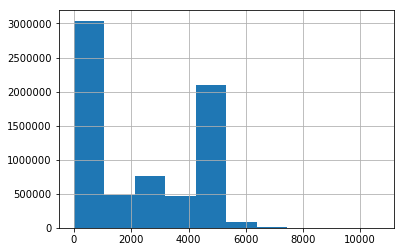

In [126]:
%matplotlib inline
raw['rmse'].hist(bins=10)

In [125]:
raw['bins_rmse'] = pd.qcut(raw['rmse'], 6)

In [123]:
filtered = raw[raw['rmse'] <= 210]

In [145]:
print filtered.shape
print raw.shape

(2567318, 13)
(6944466, 13)


In [128]:
import networkx as nx

In [135]:
filtered_deduped = filtered.drop_duplicates('networkidentifier')

In [136]:
filtered_deduped = filtered_deduped.drop(['eventtime', 'accountid', 'latitude', 'longitude', 'networktype', 'disctance_from_center', 'disctance_from_center_mean', 'squared_diference', 'rmse', 'bins_rmse'], axis=1);

In [148]:
filtered_deduped.sort_values(['latitude_r', 'longitude_r'])

,networkidentifier,latitude_r,longitude_r
6477228,ac5c430a0af254f76a9222b722ba0e8f,12.658395,77.782174
6535741,1de1a6e6fdd617b83902dc9a9bca6ae4,12.659421,77.444918
3808306,4e6859b5cda71396807956a0c063998b,12.661305,77.749318
944176,232b3d2634b248752b2283b15152aa19,12.661611,77.674662
4564376,002ec0005ab62eb2a10134088a9eb4e6,12.661611,77.674662
3572730,a5b47056539c532515fe49548c673911,12.661769,77.746124
1091474,f11cd03d14046fe0675b9f140ceb4df6,12.664642,77.754896
6568049,2b9d2fffcead4879d56130cf6dcad9dd,12.664651,77.752016
1090813,c768dfbb90fad9e3d050ce0c4f6a5da0,12.664675,77.754791
5291069,b7afa3554d91a0188eb6bb03c9575040,12.664681,77.749582


In [248]:
ltlg1 = s2sphere.LatLng.from_degrees(28.629894, 77.219493)
p1 = ltlg1.to_point()
ltlg2 = s2sphere.LatLng.from_degrees(28.557125, 77.060695)
p2 = ltlg2.to_point()
print ltlg1.get_distance(ltlg2).radians * earthRadius

17488.4551368


In [249]:
from sklearn.metrics.pairwise import euclidean_distances
X = [[p1[0], p1[1], p1[2]]]
print euclidean_distances(X, [[p2[0], p2[1], p2[2]]])[0][0]*earthRadius

17488.4496462


In [152]:
def converter(reference):
    return s2sphere.LatLng.from_degrees(reference[1], reference[2])
filtered_deduped['latlng'] = filtered_deduped.apply(converter, axis=1)

In [154]:
filtered_deduped;

In [200]:
# earthRadius = 6371000
# def d2(x, rll):
#     return x[3].get_distance(rll).radians * earthRadius

# def d1(x):
#     return filtered_deduped.apply(d2, rll=x[3], axis=1)
    
    
# dfg = filtered_deduped.apply(d1, axis=1);

In [348]:
from shapely.geometry import box, point

In [349]:
b = box(12.957712, 77.644995,12.959785, 77.643016 )
print b

POLYGON ((12.959785 77.64499499999999, 12.959785 77.643016, 12.957712 77.643016, 12.957712 77.64499499999999, 12.959785 77.64499499999999))


In [371]:
b1 = box(12.958293, 77.645960, 12.959487, 77.644725)
print b1

POLYGON ((12.959487 77.64596, 12.959487 77.64472499999999, 12.958293 77.64472499999999, 12.958293 77.64596, 12.959487 77.64596))


In [387]:
p = point.Point(12.958085, 77.644947)

print p.within(b) | p.within(b1)

True


In [351]:
upper_right = s2sphere.LatLng.from_degrees(12.958294, 77.642905)
upper_left = s2sphere.LatLng.from_degrees(12.959785 ,77.643016)
urul = upper_right.get_distance(upper_left).radians * earthRadius

In [352]:
lower_left = s2sphere.LatLng.from_degrees(12.957712,77.643016)
lower_right = s2sphere.LatLng.from_degrees(12.957712,77.64499499999999)
lower_right.get_distance(lower_left).radians * earthRadius

214.45124753965126

In [353]:
ulll = upper_left.get_distance(lower_left).radians * earthRadius

In [354]:
upper_right.get_distance(lower_right).radians * earthRadius

235.54399511681402

In [355]:
area = 0.5 * urul * ulll

In [356]:
print area

19158.2956367


In [376]:
def withi(x):
    p = point.Point(x[1], x[2])
    return p.within(b) | p.within(b1)
filtered_deduped['dd'] = filtered_deduped.apply(withi, axis=1)

In [377]:
df_dd = filtered_deduped.loc[filtered_deduped.dd == True]

In [378]:

df_dd = df_dd.sort_values(by ='latitude_r')

In [379]:
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
df_dd.head(100)

height has been deprecated.



,networkidentifier,latitude_r,longitude_r,latlng,dd
5218679,69f6c5c8db60bdb3420445910d39129f,12.957735,77.644977,"LatLng: 12.9577345,77.6449768",True
386050,d9e065c3c19bf1feb0b4622329f47a7a,12.957814,77.643219,"LatLng: 12.9578135667,77.6432187333",True
408069,e839940a8275e75c4cbab3d994b7ae11,12.957873,77.644171,"LatLng: 12.9578725,77.6441713",True
479719,d3bd8e9df1b3ac2253a7067dce23a227,12.957885,77.644440,"LatLng: 12.9578854,77.6444398",True
723481,ef347bcccd3da2d505cd877d058efcac,12.957968,77.643097,"LatLng: 12.9579682667,77.6430974",True
2651159,6a8d27f3ab40a6bf58ede641c3131163,12.958014,77.643825,"LatLng: 12.9580144231,77.6438248898",True
5398894,4bcabdc02aafc41409f990e67aa7412c,12.958067,77.643165,"LatLng: 12.9580671,77.64316455",True
6859337,2e70ac68011a35f8c2dda5551dd3fee9,12.958116,77.643724,"LatLng: 12.958116,77.6437239",True
1855641,c42b60e5eedbf0041b73b92e48b9a740,12.958192,77.644395,"LatLng: 12.9581923,77.6443951",True
600961,3bbc05b1a1d08c2ed1f10b771804c9fb,12.958196,77.643545,"LatLng: 12.9581957,77.6435449",True


In [380]:
df_dd.shape

(118, 5)

In [391]:
full_dd = raw[raw['networkidentifier'].isin(list(df_dd['networkidentifier']))]

In [396]:
full_dd

,accountid,eventtime,latitude,longitude,networkidentifier,networktype,latitude_r,longitude_r,disctance_from_center,disctance_from_center_mean,squared_diference,rmse,bins_rmse
6582047,ACZD03OQACCWS55YG93ZAO5IRXWIP2HN,2016-12-22 04:20:36.0,12.959768,77.643187,b62bcdf30fde368200c898c65793d237,WiFi,12.958753,77.643293,1.134381e+02,2.140821e+02,1.006440e+02,1.688081e+02,"(78.512, 2055.192]"
1061922,ACZD03OQACCWS55YG93ZAO5IRXWIP2HN,2016-12-09 11:01:41.0,12.959680,77.643187,b62bcdf30fde368200c898c65793d237,WiFi,12.958753,77.643293,1.036748e+02,2.140821e+02,1.104073e+02,1.688081e+02,"(78.512, 2055.192]"
6286414,ACZD03OQACCWS55YG93ZAO5IRXWIP2HN,2016-12-03 12:24:01.0,12.959860,77.643276,b62bcdf30fde368200c898c65793d237,WiFi,12.958753,77.643293,1.231648e+02,2.140821e+02,9.091723e+01,1.688081e+02,"(78.512, 2055.192]"
5322015,ACZD03OQACCWS55YG93ZAO5IRXWIP2HN,2017-01-03 11:33:03.0,12.959768,77.643187,b62bcdf30fde368200c898c65793d237,WiFi,12.958753,77.643293,1.134381e+02,2.140821e+02,1.006440e+02,1.688081e+02,"(78.512, 2055.192]"
6205144,ACG5519HWGTO11CSS3BQGVTJMG34QIQ0,2016-12-20 23:31:12.0,12.959768,77.643187,b62bcdf30fde368200c898c65793d237,WiFi,12.958753,77.643293,1.134381e+02,2.140821e+02,1.006440e+02,1.688081e+02,"(78.512, 2055.192]"
6285518,ACZD03OQACCWS55YG93ZAO5IRXWIP2HN,2016-12-03 12:23:42.0,12.959852,77.643097,b62bcdf30fde368200c898c65793d237,WiFi,12.958753,77.643293,1.240290e+02,2.140821e+02,9.005308e+01,1.688081e+02,"(78.512, 2055.192]"
4186503,ACG5519HWGTO11CSS3BQGVTJMG34QIQ0,2016-12-25 17:01:22.0,12.959600,77.643366,b62bcdf30fde368200c898c65793d237,WiFi,12.958753,77.643293,9.450633e+01,2.140821e+02,1.195757e+02,1.688081e+02,"(78.512, 2055.192]"
5968727,ACZD03OQACCWS55YG93ZAO5IRXWIP2HN,2016-12-20 00:13:47.0,12.959768,77.643187,b62bcdf30fde368200c898c65793d237,WiFi,12.958753,77.643293,1.134381e+02,2.140821e+02,1.006440e+02,1.688081e+02,"(78.512, 2055.192]"
5414524,ACZD03OQACCWS55YG93ZAO5IRXWIP2HN,2017-01-03 21:59:29.0,12.959852,77.643097,b62bcdf30fde368200c898c65793d237,WiFi,12.958753,77.643293,1.240290e+02,2.140821e+02,9.005308e+01,1.688081e+02,"(78.512, 2055.192]"
6287442,ACZD03OQACCWS55YG93ZAO5IRXWIP2HN,2016-12-03 12:15:48.0,12.959860,77.643276,b62bcdf30fde368200c898c65793d237,WiFi,12.958753,77.643293,1.231648e+02,2.140821e+02,9.091723e+01,1.688081e+02,"(78.512, 2055.192]"
